In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from helpers.split import label_strings, tag_label_feature_split

In [2]:
def logistic_regression_experiment(
    dataset, optimizer="lbfgs", max_iteration=1000, verbose=0
):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")    

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    lr = LogisticRegression(
        C=100.0,
        solver=optimizer,
        multi_class="multinomial",
        class_weight="balanced",
        max_iter=max_iteration,
        verbose=verbose,
    )

    lr.fit(X_train_std, y_train)

    predictions = lr.predict(X_test_std)
    train_accuracy = lr.score(X_train_std, y_train)
    test_accuracy = lr.score(X_test_std, y_test)

    class_names = list(le.classes_)
 
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, lr.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")
    plt.show()

    return lr



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.386007

                 precision    recall  f1-score   support

    genre_blues     0.0550    0.1818    0.0844       374
genre_classical     0.8068    0.7164    0.7589      4221
  genre_country     0.0910    0.3945    0.1479       327
    genre_disco     0.0789    0.3979    0.1317       289
   genre_hiphop     0.3767    0.2722    0.3160      1701
     genre_jazz     0.2644    0.3948    0.3167      1241
    genre_metal     0.2545    0.6992    0.3732       665
      genre_pop     0.5025    0.1404    0.2195      4274
   genre_reggae     0.2125    0.3020    0.2495       788
     genre_rock     0.5013    0.3128    0.3852      3200

       accuracy                         0.3860     17080
      macro avg     0.3144    0.3812    0.2983     17080
   weighted avg     0.4998    0.3860    0.4021     17080

Test: test_accuracy = 0.380707

                 precision    recall  f1-score   support

    genre_blues     0.

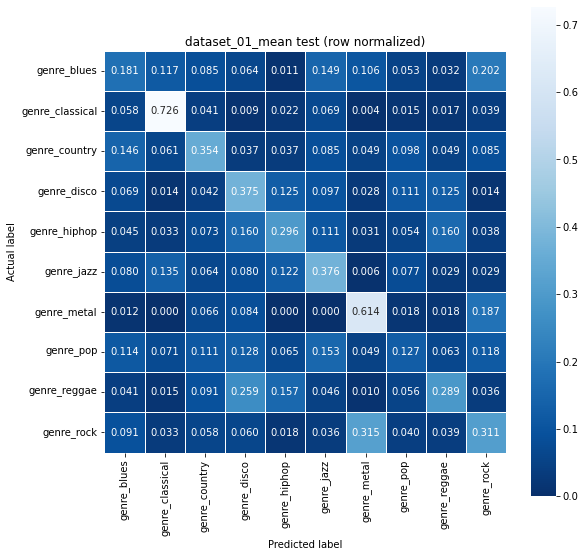



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.511651

                 precision    recall  f1-score   support

    genre_blues     0.1190    0.3850    0.1818       374
genre_classical     0.8642    0.7761    0.8178      4221
  genre_country     0.1733    0.6514    0.2738       327
    genre_disco     0.1469    0.6540    0.2398       289
   genre_hiphop     0.5555    0.4562    0.5010      1701
     genre_jazz     0.4171    0.5415    0.4712      1241
    genre_metal     0.3518    0.7940    0.4875       665
      genre_pop     0.6375    0.2485    0.3576      4274
   genre_reggae     0.4269    0.6332    0.5100       788
     genre_rock     0.6219    0.4313    0.5093      3200

       accuracy                         0.5117     17080
      macro avg     0.4314    0.5571    0.4350     17080
   weighted avg     0.6170    0.5117    0.5269     17080

Test: test_accuracy = 0.496137

                 precision    recall  f1-score   support

    genre_blues   

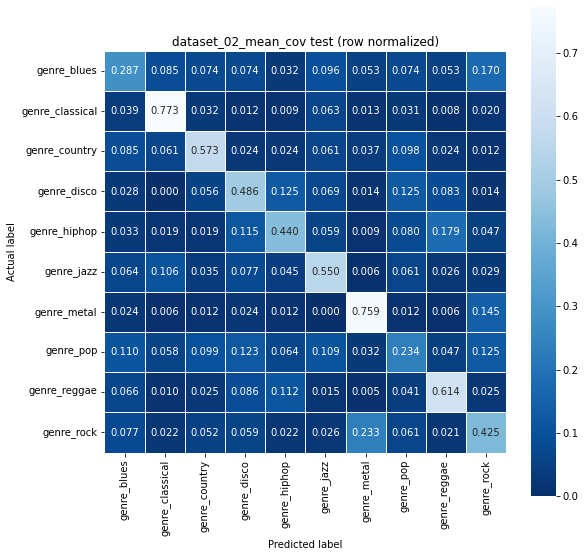



Dataset: ../../../datasets/dataset_03_mean_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.390808

                 precision    recall  f1-score   support

    genre_blues     0.0590    0.1898    0.0900       374
genre_classical     0.8130    0.7119    0.7591      4221
  genre_country     0.0945    0.4281    0.1548       327
    genre_disco     0.0996    0.4360    0.1622       289
   genre_hiphop     0.3789    0.2281    0.2848      1701
     genre_jazz     0.2726    0.4005    0.3244      1241
    genre_metal     0.2634    0.6947    0.3820       665
      genre_pop     0.5161    0.1348    0.2137      4274
   genre_reggae     0.2191    0.4860    0.3021       788
     genre_rock     0.5216    0.3209    0.3974      3200

       accuracy                         0.3908     17080
      macro avg     0.3238    0.4031    0.3070     17080
   weighted avg     0.5105    0.3908    0.4040     17080

Test: test_accuracy = 0.391243

                 precision    recall  f1-score   support

    genre_blues     0.0572    0.2021    0.0892        94
genre_classical   

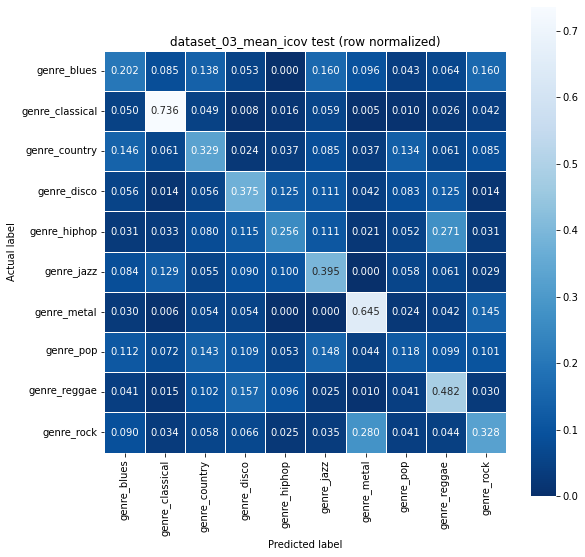



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.507845

                 precision    recall  f1-score   support

    genre_blues     0.1205    0.4037    0.1856       374
genre_classical     0.8649    0.7702    0.8148      4221
  genre_country     0.1721    0.6606    0.2731       327
    genre_disco     0.1469    0.6574    0.2402       289
   genre_hiphop     0.5635    0.4568    0.5045      1701
     genre_jazz     0.4091    0.5496    0.4691      1241
    genre_metal     0.3545    0.7880    0.4890       665
      genre_pop     0.6241    0.2323    0.3386      4274
   genre_reggae     0.4247    0.6409    0.5109       788
     genre_rock     0.6250    0.4328    0.5114      3200

       accuracy                         0.5078     17080
      macro avg     0.4305    0.5592    0.4337     17080
   weighted avg     0.6147    0.5078    0.5222     17080

Test: test_accuracy = 0.496371

                 precision    recall  f1-score   support

    genre_blues     0.0831    0.2872    0.1289        94
genre_classical   

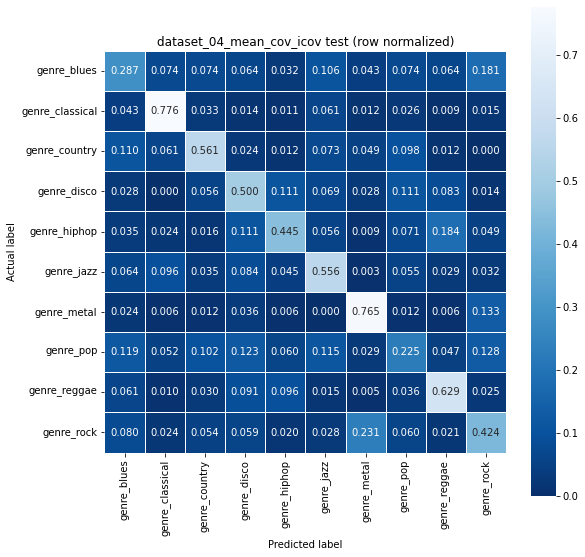



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.416745

                 precision    recall  f1-score   support

    genre_blues     0.0350    0.0374    0.0362       374
genre_classical     0.8679    0.7735    0.8180      4221
  genre_country     0.0747    0.2905    0.1188       327
    genre_disco     0.1070    0.4533    0.1732       289
   genre_hiphop     0.3574    0.2504    0.2945      1701
     genre_jazz     0.3061    0.4134    0.3517      1241
    genre_metal     0.2417    0.7774    0.3688       665
      genre_pop     0.5487    0.1582    0.2456      4274
   genre_reggae     0.2466    0.5520    0.3409       788
     genre_rock     0.4324    0.3269    0.3723      3200

       accuracy                         0.4167     17080
      macro avg     0.3217    0.4033    0.3120     17080
   weighted avg     0.5154    0.4167    0.4243     17080

Test: test_accuracy = 0.416998

                 precision    recall  f1-score   support

    genre_blues     0.

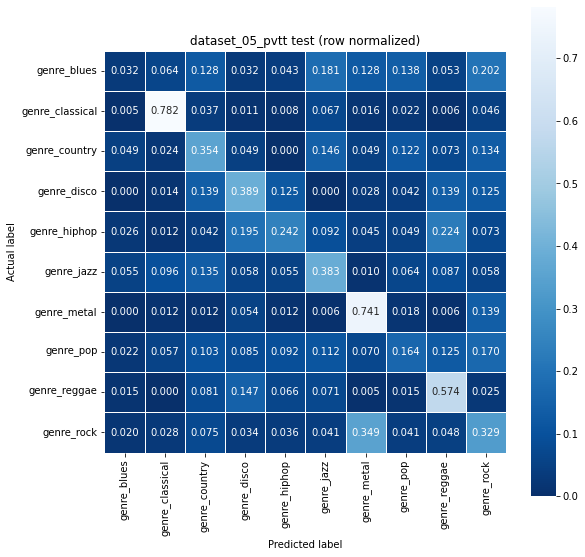



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.464052

                 precision    recall  f1-score   support

    genre_blues     0.0709    0.2005    0.1047       374
genre_classical     0.8801    0.7944    0.8350      4221
  genre_country     0.1085    0.4281    0.1732       327
    genre_disco     0.1118    0.4706    0.1806       289
   genre_hiphop     0.4854    0.4115    0.4454      1701
     genre_jazz     0.3553    0.4649    0.4028      1241
    genre_metal     0.2956    0.7534    0.4246       665
      genre_pop     0.5868    0.1788    0.2740      4274
   genre_reggae     0.3169    0.5482    0.4017       788
     genre_rock     0.5476    0.3900    0.4556      3200

       accuracy                         0.4641     17080
      macro avg     0.3759    0.4640    0.3698     17080
   weighted avg     0.5727    0.4641    0.4776     17080

Test: test_accuracy = 0.455631

                 precision    recall  f1-score   support

    genre_blues  

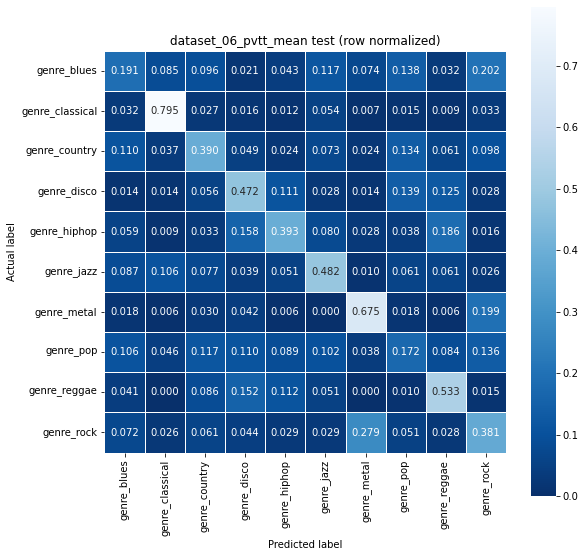



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.549005

                 precision    recall  f1-score   support

    genre_blues     0.1302    0.4198    0.1987       374
genre_classical     0.8934    0.8218    0.8561      4221
  genre_country     0.2002    0.6911    0.3104       327
    genre_disco     0.1730    0.7128    0.2784       289
   genre_hiphop     0.6110    0.5420    0.5745      1701
     genre_jazz     0.4481    0.5850    0.5075      1241
    genre_metal     0.3682    0.7895    0.5022       665
      genre_pop     0.6556    0.2686    0.3811      4274
   genre_reggae     0.4746    0.6865    0.5612       788
     genre_rock     0.6548    0.4553    0.5371      3200

       accuracy                         0.5490     17080
      macro avg     0.4609    0.5973    0.4707     17080
   weighted avg     0.6468    0.5490    0.5621     17080

Test: test_accuracy = 0.528916

                 precision    recall  f1-score   support

    genre_blues     0.0831    0.2979    0.1299        94
genre_classical   

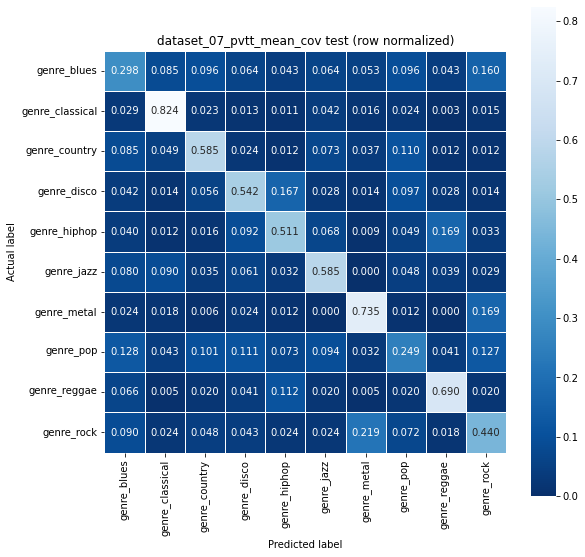



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.466920

                 precision    recall  f1-score   support

    genre_blues     0.0714    0.2059    0.1060       374
genre_classical     0.8789    0.7891    0.8316      4221
  genre_country     0.1129    0.4801    0.1828       327
    genre_disco     0.1229    0.5017    0.1974       289
   genre_hiphop     0.4833    0.4074    0.4421      1701
     genre_jazz     0.3651    0.4722    0.4118      1241
    genre_metal     0.3043    0.7564    0.4340       665
      genre_pop     0.5919    0.1778    0.2735      4274
   genre_reggae     0.3235    0.5838    0.4163       788
     genre_rock     0.5633    0.3947    0.4642      3200

       accuracy                         0.4669     17080
      macro avg     0.3817    0.4769    0.3760     17080
   weighted avg     0.5781    0.4669    0.4801     17080

Test: test_accuracy = 0.457972

                 precision    recall  f1-score   support

    genre_blues     0.0671    0.2128    0.1020        94
genre_classical   

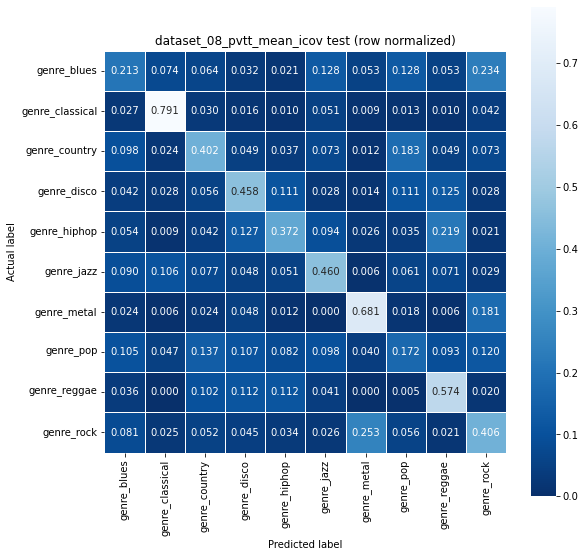



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.547541

                 precision    recall  f1-score   support

    genre_blues     0.1318    0.4358    0.2024       374
genre_classical     0.8915    0.8216    0.8551      4221
  genre_country     0.2000    0.7034    0.3114       327
    genre_disco     0.1702    0.6955    0.2735       289
   genre_hiphop     0.6175    0.5467    0.5800      1701
     genre_jazz     0.4490    0.5786    0.5056      1241
    genre_metal     0.3660    0.7925    0.5007       665
      genre_pop     0.6534    0.2611    0.3731      4274
   genre_reggae     0.4760    0.6916    0.5639       788
     genre_rock     0.6538    0.4544    0.5361      3200

       accuracy                         0.5475     17080
      macro avg     0.4609    0.5981    0.4702     17080
   weighted avg     0.6462    0.5475    0.5602     17080

Test: test_accuracy = 0.531257

                 precision    recall  f1-score   support

    genre_blues     0.0821    0.2979    0.1287        94
genre_classical   

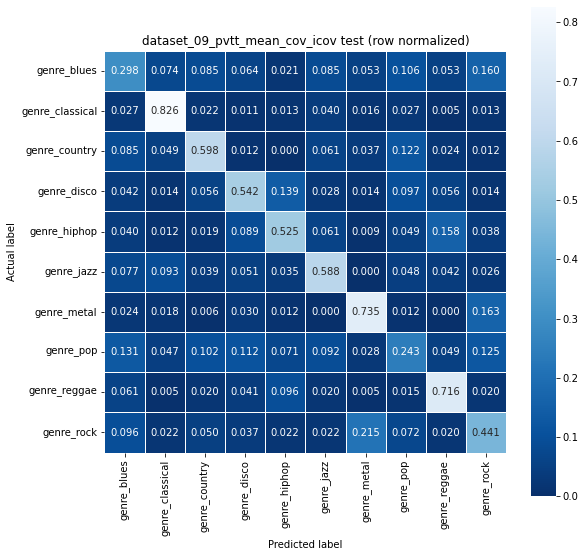

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "*.pickle")])
for dataset in datasets:
    logistic_regression_experiment (dataset)